<a href="https://colab.research.google.com/github/abubakarkhanlakhwera/Deepl-Learing/blob/main/Dropout_layer/Dropout_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding Overfitting in Artificial Neural Networks (ANN)

Overfitting occurs when a machine learning model learns not only the underlying patterns in the training data but also the noise and outliers. This leads to a model that performs exceptionally well on the training data but poorly on unseen or test data, as it fails to generalize.

#### Context of the Image:
1. **Data Points**:
   - Blue points represent one class, while red points represent another class in a dataset.
   - The model aims to separate these classes using a decision boundary.

2. **Overfitted Model**:
   - The green line in the diagram illustrates the decision boundary of an overfitted model.
   - It adapts excessively to the noise in the training data, resulting in a highly complex decision boundary that closely follows individual data points.

3. **Simpler Decision Boundary**:
   - The black line represents a simpler and more generalized decision boundary.
   - It focuses on capturing the overall structure of the data, even if some individual points are misclassified.

4. **Artificial Neural Network Representation**:
   - A small schematic of an ANN is included to indicate the connection between overfitting and the complexity of neural networks.
   - Overfitting often arises in ANN models due to excessive complexity, such as too many layers or neurons, or insufficient regularization.

#### Key Takeaways:
- Overfitting can lead to poor performance on new data.
- Simplifying the model, regularizing, or increasing the training data can help mitigate overfitting.
- Striking the right balance between model complexity and generalization is crucial.



#### **Solutions to Overfitting**:
To mitigate overfitting, consider the following strategies:

1. **Increase the Amount of Data**:
   - Provide more training data so the model can better generalize.

2. **Reduce Model Complexity**:
   - Use fewer layers or neurons in the neural network.
   - Simplify the architecture by removing unnecessary parameters.

3. **Regularization**:
   - Apply **L1** or **L2 regularization** to add penalties for large weights.
   - Use **dropout layers** to randomly disable a fraction of neurons during training.

4. **Early Stopping**:
   - Monitor the validation loss and stop training when it starts to increase, even if training loss continues to decrease.

5. **Cross-Validation**:
   - Use k-fold cross-validation to ensure the model performs consistently across different subsets of the data.

6. **Data Augmentation**:
   - For image, text, or audio data, apply transformations to artificially expand the dataset (e.g., rotations, flips, noise injection).

7. **Batch Normalization**:
   - Normalize the inputs to each layer, which can help the model generalize better and reduce sensitivity to initialization.

8. **Adjust Hyperparameters**:
   - Reduce the learning rate to ensure the model converges smoothly.
   - Limit the number of epochs to avoid overfitting after a certain point.

---

#### **Key Takeaways**:
- Overfitting can lead to poor performance on unseen data.
- A balance between underfitting (too simple) and overfitting (too complex) is essential.
- Experimentation and careful tuning of hyperparameters are critical for optimal performance.

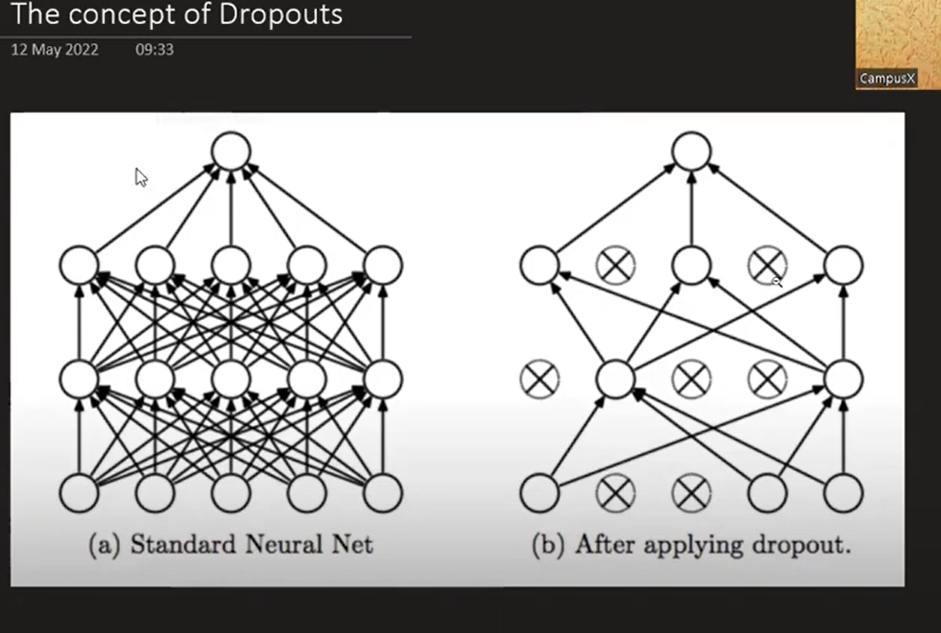

### Dropout: A Regularization Technique to Prevent Overfitting

#### **What is Dropout?**
Dropout is a regularization technique used in neural networks to prevent overfitting. It works by randomly "dropping out" (i.e., setting to zero) a fraction of neurons during training at each iteration. This prevents the network from relying too heavily on specific neurons and forces it to learn more robust and generalized features.

---

#### **How Does Dropout Work?**
1. **Randomly Disable Neurons**:
   - During each training iteration, a certain percentage of neurons in a layer are randomly selected and ignored (set to zero).
   - These neurons neither contribute to forward propagation nor receive updates during backpropagation.

2. **Adjusting During Inference**:
   - During inference (testing), dropout is not applied.
   - Instead, the weights of the neurons are scaled down by the dropout rate (or probability of being dropped) to account for the reduced number of active neurons during training.

3. **Dropout Rate**:
   - The **dropout rate** specifies the fraction of neurons to drop (e.g., 0.2 means 20% of neurons are dropped).

---

#### **Benefits of Dropout**:
1. **Prevents Overfitting**:
   - Dropout reduces the risk of overfitting by preventing the network from relying too heavily on specific neurons.

2. **Encourages Redundancy**:
   - By forcing the network to learn from different subsets of neurons, it promotes redundancy in feature representation.

3. **Improves Generalization**:
   - Dropout enhances the model's ability to generalize to unseen data by introducing noise during training.

---




In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **Generate Data**

In [20]:
X_train = np.linspace(-1,1,20)

In [21]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [22]:
X_test = np.linspace(-1,1,20)

In [23]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

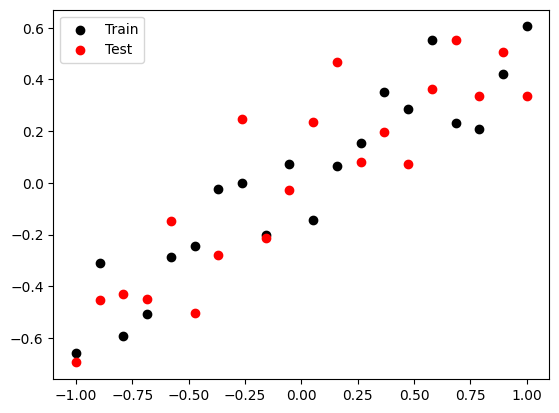

In [24]:
plt.scatter(X_train,y_train, c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.legend()
plt.show()

# **Regression Model**

In [25]:
from re import A
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test,y_test), verbose=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
#Evaluate the model
_, train_mse = model.evaluate(X_train, y_train,verbose=0)
_, test_mse = model.evaluate(X_test, y_test)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0440
Train MSE: 0.0
Test MSE: 0.0


In [28]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


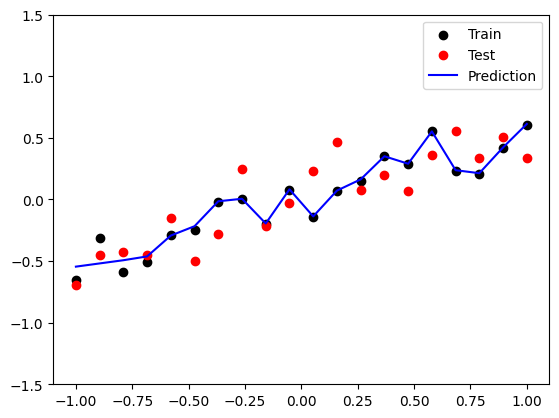

In [29]:
plt.figure()
plt.scatter(X_train,y_train, c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred  ,c='blue',label='Prediction')
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()

# **Dropout Model**

In [30]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, input_dim=1, activation='relu'))

model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test,y_test), verbose=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train,verbose=0)
_, test_mse = model.evaluate(X_test, y_test)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0393 - mse: 0.0393
Train MSE: 0.010947479866445065
Test MSE: 0.039283934980630875


In [33]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


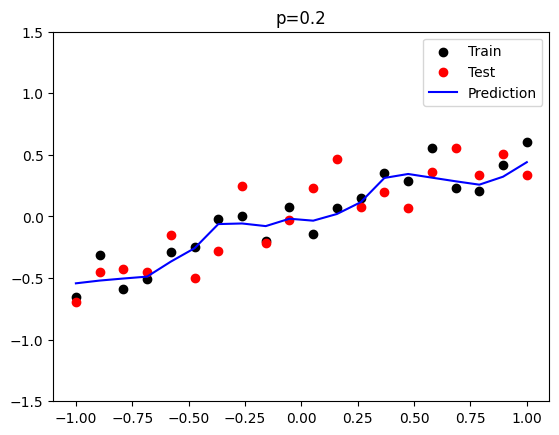

In [34]:
plt.figure()
plt.title('p=0.2')
plt.scatter(X_train,y_train, c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred  ,c='blue',label='Prediction')
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()